In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.concat ([pd.read_csv("datasets/d1.csv"), pd.read_csv("datasets/d2.csv"), pd.read_csv("datasets/d3.csv"),pd.read_csv("datasets/d4.csv")])
print(df.shape)
df.head()
#Create dataframe with variables we need
df_WIP = df.loc[:,['daysonmarket', 'engine_displacement', 
              'frame_damaged', 'has_accidents', 'horsepower',
              'major_options', 'mileage', 'owner_count', 'price', 'year']]
df_WIP = df_WIP.reset_index()
df_WIP = df_WIP.drop(['index'], axis = 1)
#Turn major_options into # of major options
#df_test = df_WIP['major_options'].apply(lambda x : x.split(','))
#df_test = df_test.apply(lambda x : np.size(x))
#df_WIP['major_options'] = df_test
#convert True/False data into 1/0
mo = df_WIP['major_options']
mo = mo.str.replace("[","")
mo = mo.str.replace("]","")
mo = mo.str.replace("'","")
mo = mo.str.get_dummies(',')
df_WIP = pd.concat([df_WIP, mo], axis="columns")
df_WIP = df_WIP.drop(columns=['major_options'])



df_WIP[['frame_damaged', 'has_accidents']] = df_WIP[['frame_damaged', 'has_accidents']].astype(int)
df_WIP.head()

(1330246, 19)


,daysonmarket,engine_displacement,frame_damaged,has_accidents,horsepower,mileage,owner_count,price,year,101A Mid Equipment Group,...,Ultimate Package,Ultra Luxury Package,Upgrade Package,Utility Package,Value Package,Winter Package,Wood Trim Package,XLE Package,XLT Package,Z 71 Package
0,1252,1700.0,0,0,237.0,301.0,2.0,97579.0,2015,0,...,0,0,0,0,0,0,0,0,0,0
1,1233,3000.0,0,0,320.0,6903.0,2.0,58995.0,2016,0,...,0,0,0,0,0,0,0,0,0,0
2,33,1600.0,0,0,201.0,30707.0,1.0,13324.0,2017,0,...,0,0,0,0,0,0,0,0,0,0
3,55,1500.0,0,0,160.0,42394.0,1.0,14639.0,2018,0,...,0,0,0,0,0,0,0,0,0,0
4,36,3500.0,0,0,311.0,62251.0,1.0,32000.0,2018,0,...,0,0,0,0,0,0,0,0,0,0


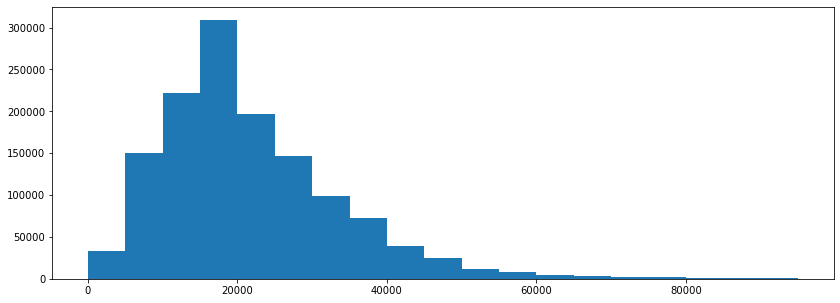

In [2]:
df_pa = df_WIP['price']
plt.figure(figsize=(14, 5))
plt.hist(df_pa, bins=range(0, 100000, 5000))
plt.show()

In [3]:
pa_c, priceInterval = pd.qcut(x=df_pa, q=12, retbins=True)
del pa_c
priceInterval[0] = 0
for i in range(priceInterval.shape[0]):
    priceInterval[i] = int(round(priceInterval[i], -3))
priceInterval

array([      0.,    8000.,   11000.,   14000.,   16000.,   18000.,
         19000.,   22000.,   25000.,   28000.,   33000.,   40000.,
       3195000.])

In [4]:
priceInterval = priceInterval[0:-1].tolist()
priceInterval[6] = 20000
priceInterval.extend([55000, 70000, 100000, 150000, 200000])

In [5]:
price_count = pd.DataFrame({'lower bound':[], 'upper bound':[], 'count': []})
for i in range(len(priceInterval)):
    lower = priceInterval[i]
    if i < len(priceInterval) - 1:
        upper = priceInterval[i + 1]
        rowCount = df_pa.loc[(df_pa >= lower) & (df_pa < upper)].shape[0]
        price_count.loc[len(price_count.index)] = [lower, upper, rowCount]
    else:
        rowCount = df_pa.loc[(df_pa >= lower)].shape[0]
        price_count.loc[len(price_count.index)] = [lower, np.nan, rowCount]
        break

price_count

,lower bound,upper bound,count
0,0.0,8000.0,112322.0
1,8000.0,11000.0,106386.0
2,11000.0,14000.0,129798.0
3,14000.0,16000.0,115528.0
4,16000.0,18000.0,129450.0
5,18000.0,20000.0,120058.0
6,20000.0,22000.0,86261.0
7,22000.0,25000.0,110041.0
8,25000.0,28000.0,90715.0
9,28000.0,33000.0,117408.0


In [11]:
# Convert price to prive interval

df_update = df_WIP[df_WIP.price < 150000]
#Cuts out outlier data (We could leave this in if we want)


In [59]:
df_temptest = df_update.copy(deep = True)
type(df_temptest)

pandas.core.frame.DataFrame

In [9]:
#price_adjuster(df_temptest)

#df_temptest.loc[(0 <= df_temptest['price']) & (df_temptest['price'] <= 8000), ['price']] = '$0 to 8000'
#df_temptest.loc[(8000 < df_temptest['price']) & (df_temptest['price'] <= 11000), ['price']] = '$8001 to 11000'
#df_temptest.loc[(11000 < df_temptest['price']) & (df_temptest['price'] <= 14000), ['price']] = '$11001 to 14000'
#df_temptest.loc[(14000 < df_temptest['price']) & (df_temptest['price'] <= 16000), ['price']] = '$14001 to 16000'
#df_temptest.loc[(16000 < df_temptest['price']) & (df_temptest['price'] <= 18000), ['price']] = '$16001 to 18000'
#df_temptest.loc[(18000 < df_temptest['price']) & (df_temptest['price'] <= 20000), ['price']] = '$18001 to 20000'
#df_temptest.loc[(22000 < df_temptest['price']) & (df_temptest['price'] <= 25000), ['price']] = '$22001 to 25000'
#df_temptest.loc[(25000 < df_temptest['price']) & (df_temptest['price'] <= 28000), ['price']] = '$25001 to 28000'
#df_temptest.loc[(28000 < df_temptest['price']) & (df_temptest['price'] <= 33000), ['price']] = '$28001 to 33000'
#df_temptest.loc[(33000 < df_temptest['price']) & (df_temptest['price'] <= 40000), ['price']] = '$33001 to 40000'
#df_temptest.loc[(40000 < df_temptest['price']) & (df_temptest['price'] <= 55000), ['price']] = '$40001 to 55000'
#df_temptest.loc[(55000 < df_temptest['price']) & (df_temptest['price'] <= 70000), ['price']] = '$55001 to 70000'
#df_temptest.loc[(70000 < df_temptest['price']) & (df_temptest['price'] <= 100000), ['price']] = '$70001 to 100000'
#df_temptest.loc[(100000 < df_temptest['price']) & (df_temptest['price'] <= 150000), ['price']] = '$22001 to 25000'

In [60]:
df_temptest['price_range'] = 0
df_temptest.loc[(0 <= df_temptest['price']) & (df_temptest['price'] <= 8000), ['price_range']] = '$0 to 8000'
df_temptest.loc[(8000 < df_temptest['price']) & (df_temptest['price'] <= 11000), ['price_range']] = '$8001 to 11000'
df_temptest.loc[(11000 < df_temptest['price']) & (df_temptest['price'] <= 14000), ['price_range']] = '$11001 to 14000'
df_temptest.loc[(14000 < df_temptest['price']) & (df_temptest['price'] <= 16000), ['price_range']] = '$14001 to 16000'
df_temptest.loc[(16000 < df_temptest['price']) & (df_temptest['price'] <= 18000), ['price_range']] = '$16001 to 18000'
df_temptest.loc[(18000 < df_temptest['price']) & (df_temptest['price'] <= 20000), ['price_range']] = '$18001 to 20000'
df_temptest.loc[(20000 < df_temptest['price']) & (df_temptest['price'] <= 22000), ['price_range']] = '$20001 to 25000'
df_temptest.loc[(22000 < df_temptest['price']) & (df_temptest['price'] <= 25000), ['price_range']] = '$22001 to 25000'
df_temptest.loc[(25000 < df_temptest['price']) & (df_temptest['price'] <= 28000), ['price_range']] = '$25001 to 28000'
df_temptest.loc[(28000 < df_temptest['price']) & (df_temptest['price'] <= 33000), ['price_range']] = '$28001 to 33000'
df_temptest.loc[(33000 < df_temptest['price']) & (df_temptest['price'] <= 40000), ['price_range']] = '$33001 to 40000'
df_temptest.loc[(40000 < df_temptest['price']) & (df_temptest['price'] <= 55000), ['price_range']] = '$40001 to 55000'
df_temptest.loc[(55000 < df_temptest['price']) & (df_temptest['price'] <= 70000), ['price_range']] = '$55001 to 70000'
df_temptest.loc[(70000 < df_temptest['price']) & (df_temptest['price'] <= 100000), ['price_range']] = '$70001 to 100000'
df_temptest.loc[(100000 < df_temptest['price']) & (df_temptest['price'] <= 150000), ['price_range']] = '$100001 to 150000'

#creates a new column "price_range"

In [54]:
df_temptest['price_range'].unique()
miketyson = df_temptest.loc[df_temptest['price_range'] == 0]
miketyson['price']

22         20879.0
37         22000.0
44         20439.0
53         21500.0
73         21700.0
            ...   
1330208    20620.0
1330212    21000.0
1330228    21998.0
1330238    20700.0
1330239    20998.0
Name: price, Length: 85397, dtype: float64

In [107]:
#split to target variable/rest

y = df_temptest['price_range']
X = df_temptest.drop(['price_range'], axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import plot_confusion_matrix, f1_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score
from sklearn.pipeline import make_pipeline

#This encodes our categories for price_range in a format usable by the model
le = preprocessing.LabelEncoder()
le.fit(y)
y_workable = le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_workable, test_size = 0.33, random_state = 42)

scaler = StandardScaler()
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
logistic = LogisticRegression(penalty='l1', )



pipe = Pipeline(steps=[("scaler", scaler), ("imputer", imp), ("logistic", logistic)])

param_grid = { 'logistic__solver': ('saga', 'liblinear'), 'logistic__max_iter' : (800,)}

gscv =  GridSearchCV(estimator = pipe, param_grid = param_grid, cv = 7, scoring = 'f1_micro')
gscv.fit(X_train, y_train)

#print(model.get_params())
y_pred = gscv.predict(X_test)
print(r2_score(y_test, y_pred))


#Logistic regression attempted


In [98]:
le = preprocessing.LabelEncoder()
le.fit(y)



LabelEncoder()

In [99]:
le.classes_

array(['$0 to 8000', '$100001 to 150000', '$11001 to 14000',
       '$14001 to 16000', '$16001 to 18000', '$18001 to 20000',
       '$20001 to 25000', '$22001 to 25000', '$25001 to 28000',
       '$28001 to 33000', '$33001 to 40000', '$40001 to 55000',
       '$55001 to 70000', '$70001 to 100000', '$8001 to 11000'],
      dtype=object)

In [100]:
y_transformed = le.transform(y)



In [104]:
unencoded_pred = le.inverse_transform(y_pred)
unencoded = list(le.inverse_transform(y_transformed))


In [106]:
y_pred

array([ 1, 14, 10, ...,  9,  7,  2], dtype=int64)